In [1]:
END_DATASET = '2023-10-20'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# data load
df = pd.read_csv('./data/GOOGL_REAL.csv')
# first 5 rows
df.head()


,date,open,high,low,close,volume
0,2004-08-19,2.5080,2.6096,2.4064,2.5161,893180000
1,2004-08-20,2.5331,2.7354,2.5203,2.7161,456686000
2,2004-08-23,2.7776,2.8458,2.7347,2.7435,365122000
3,2004-08-24,2.7896,2.7986,2.5973,2.6299,304946000
4,2004-08-25,2.6271,2.7084,2.6050,2.6582,183772000


In [3]:
df.tail()

,date,open,high,low,close,volume
4822,2023-10-16,138.170,139.63,137.99,139.095,26312421
4823,2023-10-17,138.630,139.90,137.18,139.720,23111555
4824,2023-10-18,139.445,140.72,137.38,137.960,23291076
4825,2023-10-19,138.500,139.66,137.38,137.750,25883936
4826,2023-10-20,137.330,137.87,135.08,135.600,25687445


In [4]:
# Number of rows and columns
print(df.shape)

(4827, 6)


In [5]:
# date column to datetime conversion
df['date'] = pd.to_datetime(df['date'])
if df['date'].dtype == 'datetime64[ns]':
    print('Date column converted to datetime')

Date column converted to datetime


In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4827 entries, 0 to 4826
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4827 non-null   datetime64[ns]
 1   open    4827 non-null   float64       
 2   high    4827 non-null   float64       
 3   low     4827 non-null   float64       
 4   close   4827 non-null   float64       
 5   volume  4827 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 226.4 KB


In [7]:
# keep the data from 2016  
df = df[df['date'] > '2021-01-01']
df.head()

,date,open,high,low,close,volume
4122,2021-01-04,88.0000,88.1245,85.357,86.3065,37323900
4123,2021-01-05,86.2545,87.3415,85.845,87.0025,20318840
4124,2021-01-06,85.0130,87.1980,84.805,86.1440,46588020
4125,2021-01-07,86.3380,88.8910,86.338,88.7170,41737360
4126,2021-01-08,88.8580,89.9680,88.061,89.8915,35484520


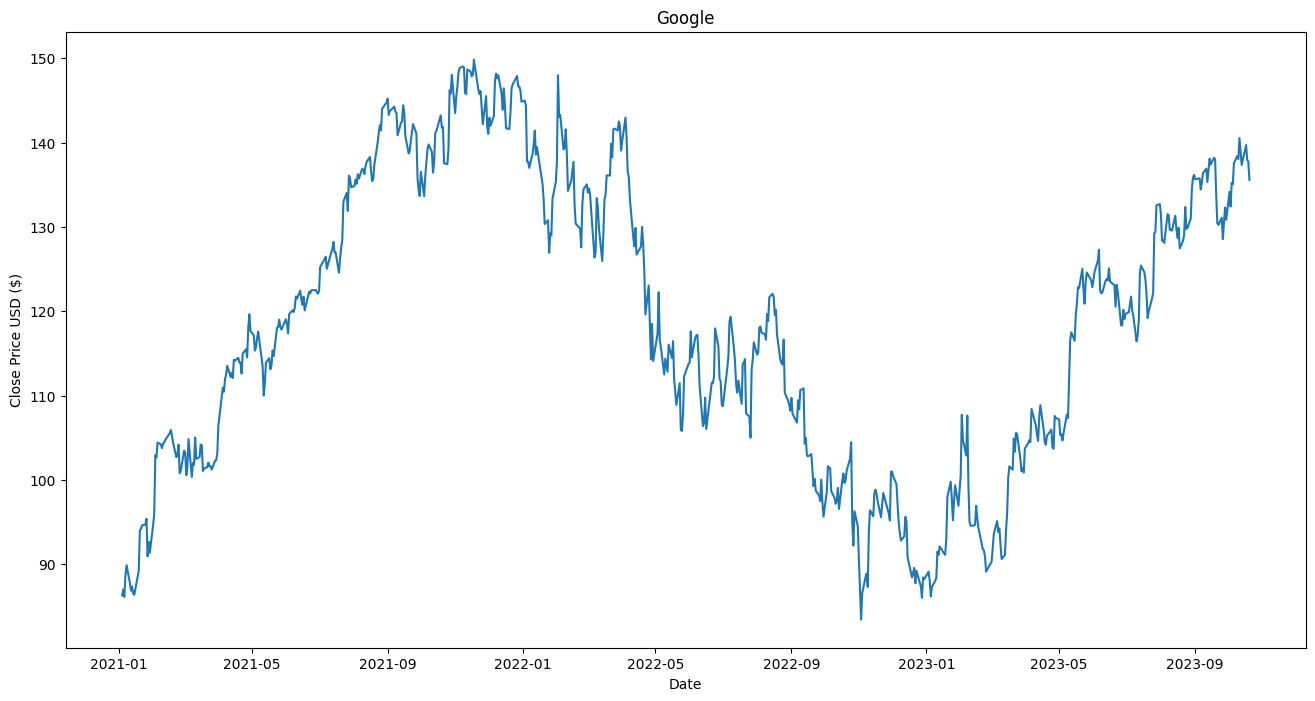

In [8]:
# DATA VISUALIZATION
# close price history with date

plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df['date'], df['close'])
# plt.plot(df['Date'], df['Close'])
plt.show()


In [9]:
# Data description
df.describe()

,date,open,high,low,close,volume
count,705,705.000000,705.000000,705.000000,705.000000,7.050000e+02
mean,2022-05-28 03:30:22.978723328,118.239988,119.646446,116.917605,118.300375,3.234048e+07
min,2021-01-04 00:00:00,85.013000,86.520000,83.340000,83.430000,9.682538e+06
25%,2021-09-15 00:00:00,103.130000,104.820000,102.206000,103.730000,2.398340e+07
50%,2022-05-26 00:00:00,118.245500,119.200000,116.775000,118.080000,2.927698e+07
75%,2023-02-08 00:00:00,134.261500,135.670000,132.965500,134.459500,3.686742e+07
max,2023-10-20 00:00:00,151.250000,151.546500,148.899000,149.838500,1.205900e+08
std,NaN,17.557321,17.481551,17.422275,17.441802,1.317168e+07


In [10]:
# dataframe conversion to time series
# we'll keep all the columns
df = df.set_index('date')


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 705 entries, 2021-01-04 to 2023-10-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    705 non-null    float64
 1   high    705 non-null    float64
 2   low     705 non-null    float64
 3   close   705 non-null    float64
 4   volume  705 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 33.0 KB


In [12]:
# DATA PREPROCESSING
# check for null values
print(df.isnull().sum())


open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [13]:

# check for duplicates
print(df.duplicated().sum())


0


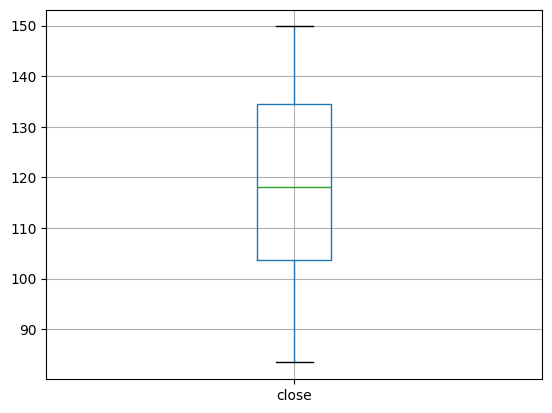

In [14]:
# check for outliers
# boxplot
df.boxplot(column=['close'])
plt.show()

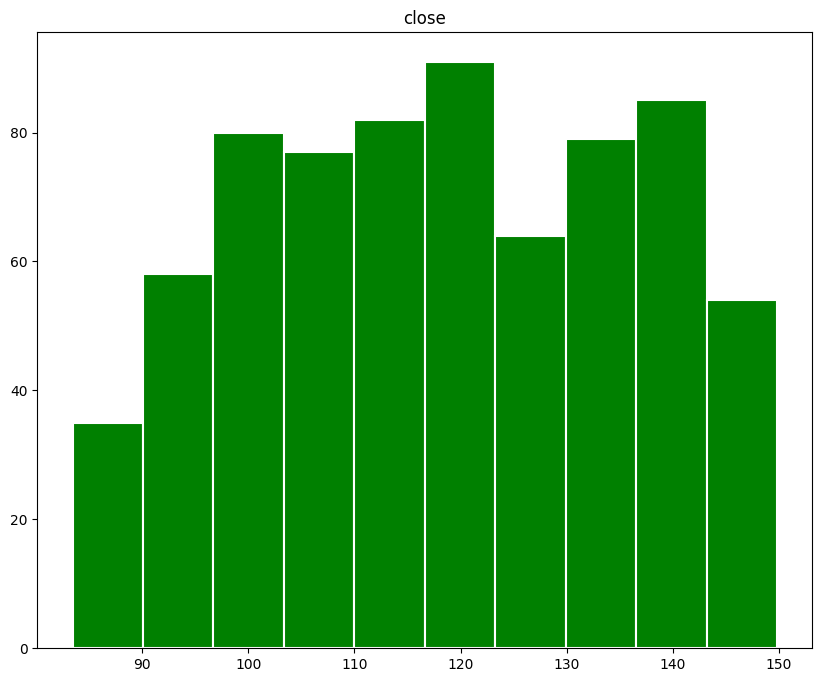

In [15]:
# histogram
# need more values to x axis
df.hist(column=['close'], bins=10, figsize=(10,8), color='green', edgecolor='white', linewidth=1.5, grid=False)

plt.show()

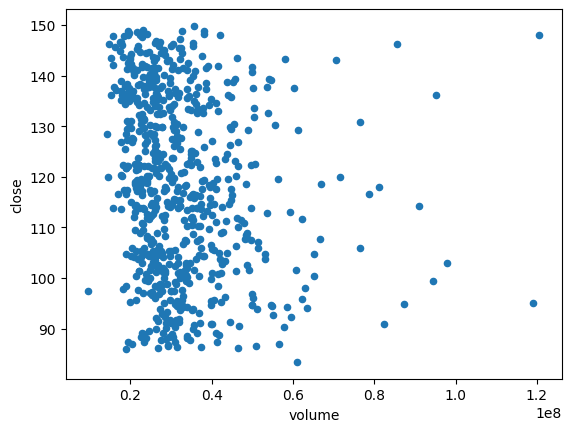

In [16]:
# scatter plot
df.plot.scatter(x='volume', y='close')
plt.show()


TREND IDENTIFICATION

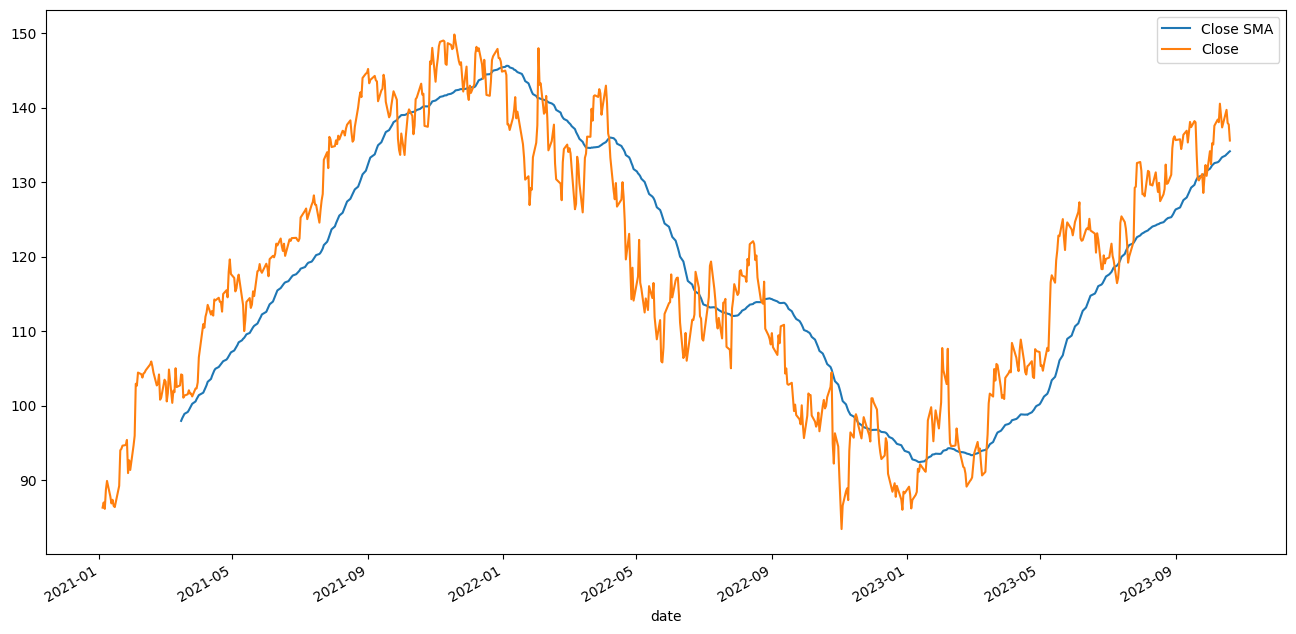

In [17]:
# simple moving average
sma = pd.DataFrame()
sma['close'] = df['close'].rolling(window=50).mean()
sma['close'].plot(figsize=(16,8), label='Close SMA')
# display also the close price
df['close'].plot(label='Close')
plt.legend()
plt.show()

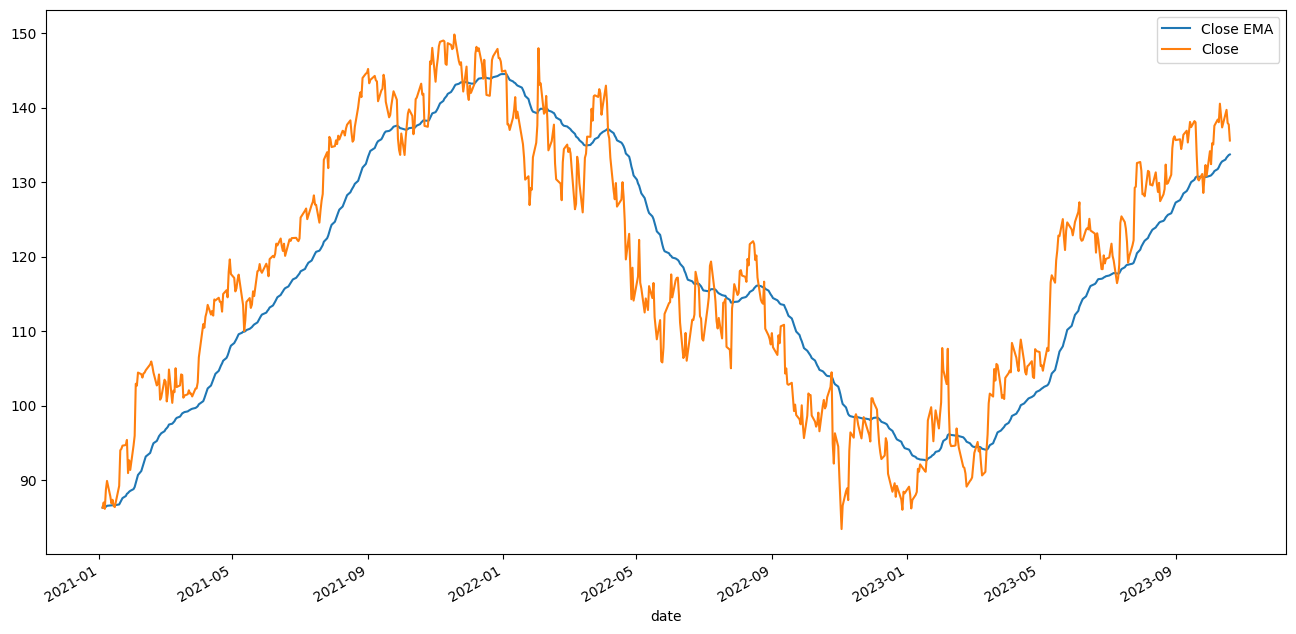

In [18]:
# exponential moving average
# it's exponential because it gives more weight to more recent values
ema = pd.DataFrame()
ema['close'] = df['close'].ewm(span=50, adjust=False).mean()
ema['close'].plot(figsize=(16,8), label='Close EMA')
# also display the close price
df['close'].plot(label='Close')
plt.legend()
plt.show()


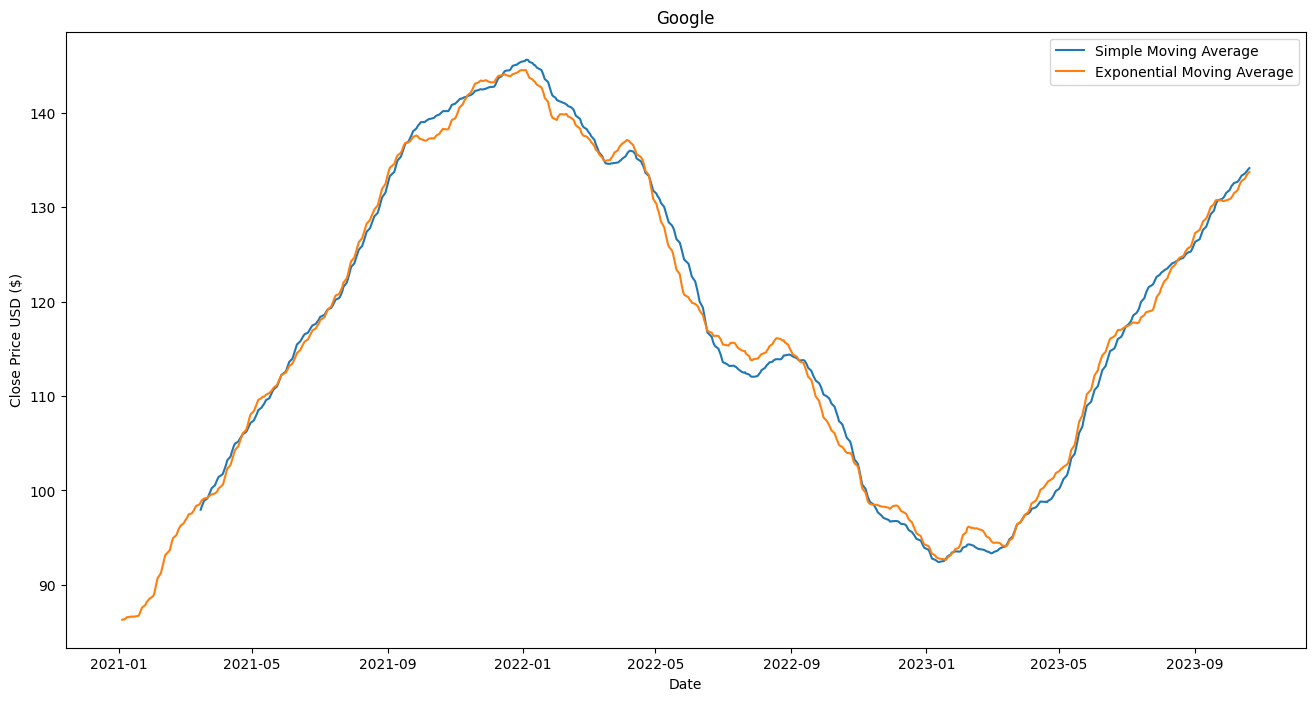

In [19]:
# superposing sma and ema
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
# plt.plot(df['close'], label='Close')
plt.plot(sma['close'], label='Simple Moving Average')
plt.plot(ema['close'], label='Exponential Moving Average')
plt.legend()
plt.show()



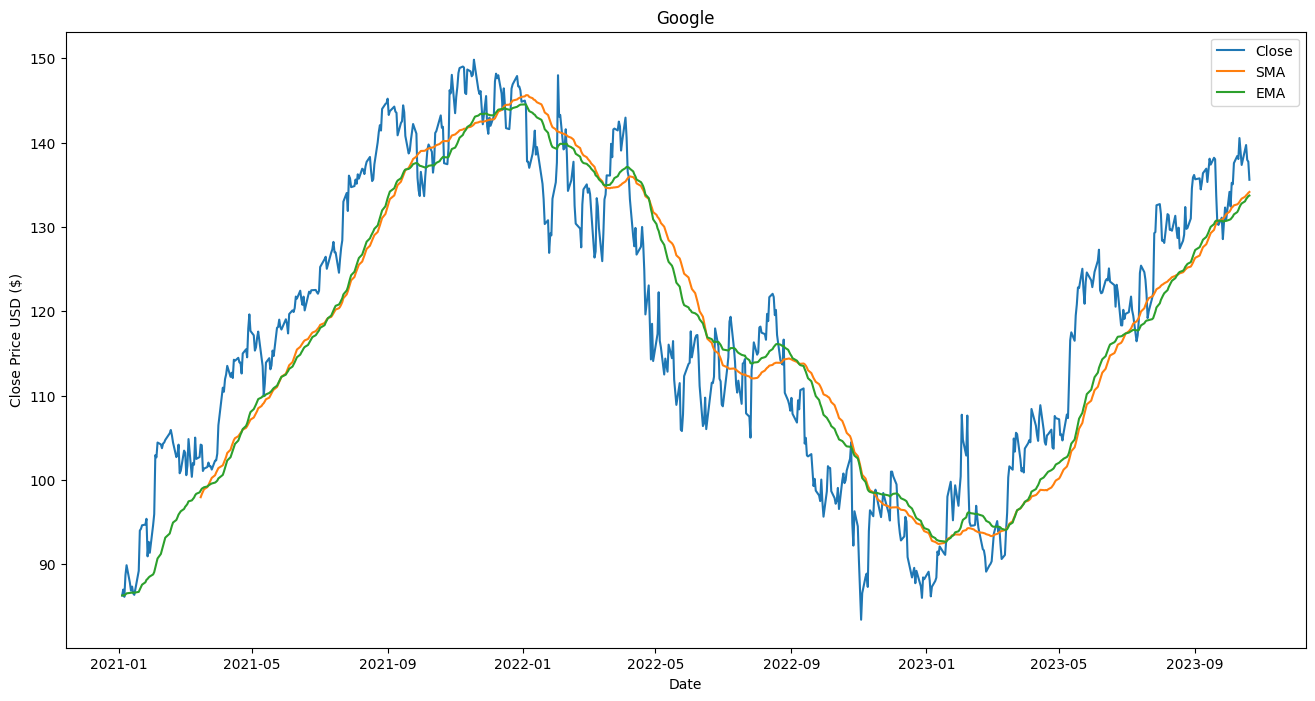

In [20]:
# plotting sma, ema and close price
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'], label='Close')
plt.plot(sma['close'], label='SMA')
plt.plot(ema['close'], label='EMA')
plt.legend()
plt.show()


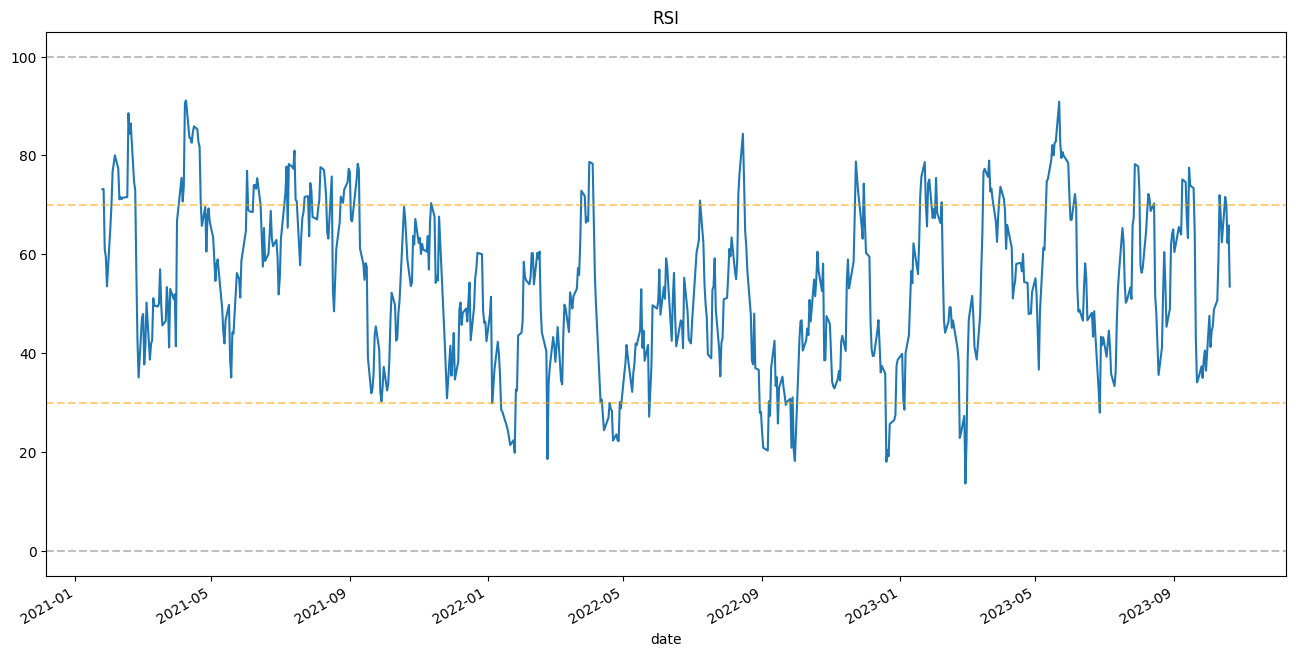

In [21]:
# RSI
# Relative Strength Index
# RS = AVG Gain / AVG Loss
# RSI = 100 - (100 / (1 + RS))
# 14 day RSI
delta = df['close'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[up<0] = 0
down[down>0] = 0
period = 14
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0 / (1.0 + RS))

plt.figure(figsize=(16,8))
RSI.plot()
# draw the 30 and 70 lines
plt.axhline(0, linestyle='--', alpha=0.5, color='gray')
plt.axhline(30, linestyle='--', alpha=0.5, color='orange')
plt.axhline(70, linestyle='--', alpha=0.5, color='orange')
plt.axhline(100, linestyle='--', alpha=0.5, color='gray')
plt.title('RSI')

plt.show()



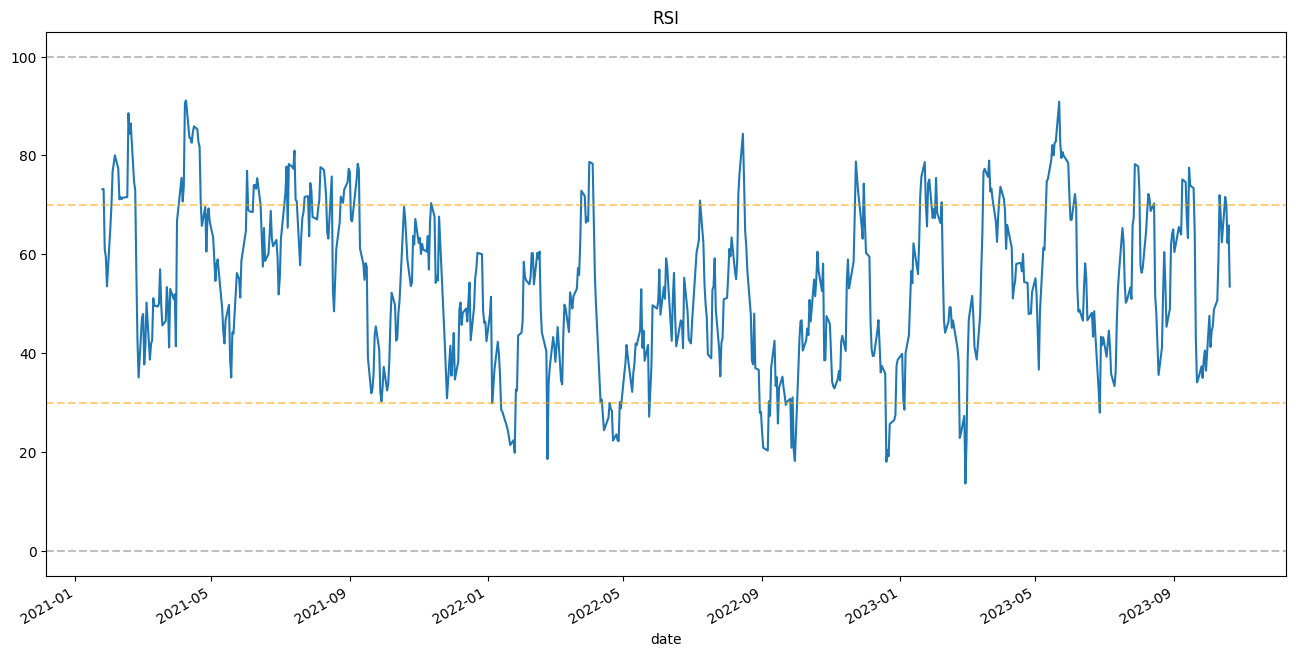

In [22]:

down[down>0] = 0
period = 14
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0 / (1.0 + RS))

plt.figure(figsize=(16,8))
RSI.plot()
# draw the 30 and 70 lines
plt.axhline(0, linestyle='--', alpha=0.5, color='gray')
plt.axhline(30, linestyle='--', alpha=0.5, color='orange')
plt.axhline(70, linestyle='--', alpha=0.5, color='orange')
plt.axhline(100, linestyle='--', alpha=0.5, color='gray')
plt.title('RSI')

plt.show()



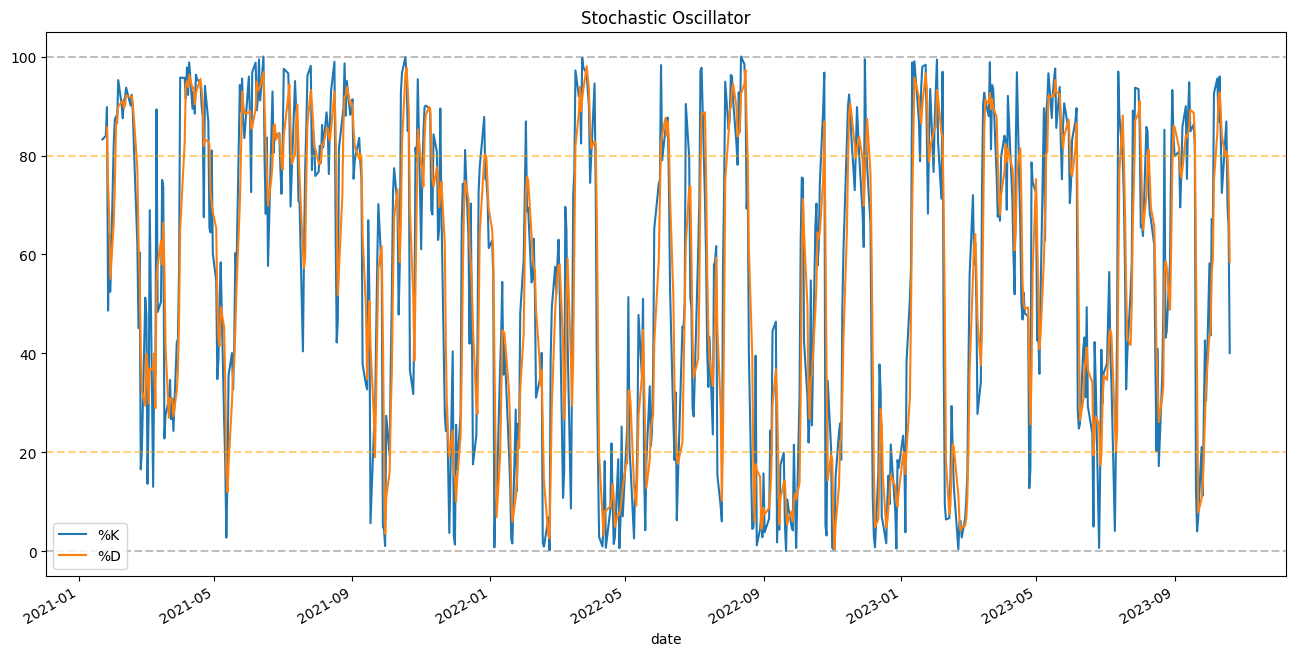

In [23]:
# stochastic oscillator
# 14 day stochastic oscillator
# %K = (Current Close - Lowest Low)/(Highest High - Lowest Low) * 100
# %D = 3-day SMA of %K
# Lowest Low = lowest low for the look-back period
# Highest High = highest high for the look-back period
# %K is multiplied by 100 to move the decimal point two places
# Fast Stochastic Oscillator

low_14 = df['low'].rolling(window=14).min()
low_14 = low_14.dropna()
high_14 = df['high'].rolling(window=14).max()
high_14 = high_14.dropna()
k = 100 * ((df['close'] - low_14) / (high_14 - low_14))
d = k.rolling(window=3).mean()

plt.figure(figsize=(16,8))
k.plot(label='%K')
d.plot(label='%D')

plt.axhline(0, linestyle='--', alpha=0.5, color='gray')
plt.axhline(20, linestyle='--', alpha=0.5, color='orange')
plt.axhline(80, linestyle='--', alpha=0.5, color='orange')
plt.axhline(100, linestyle='--', alpha=0.5, color='gray')

plt.title('Stochastic Oscillator')
plt.legend()
plt.show()

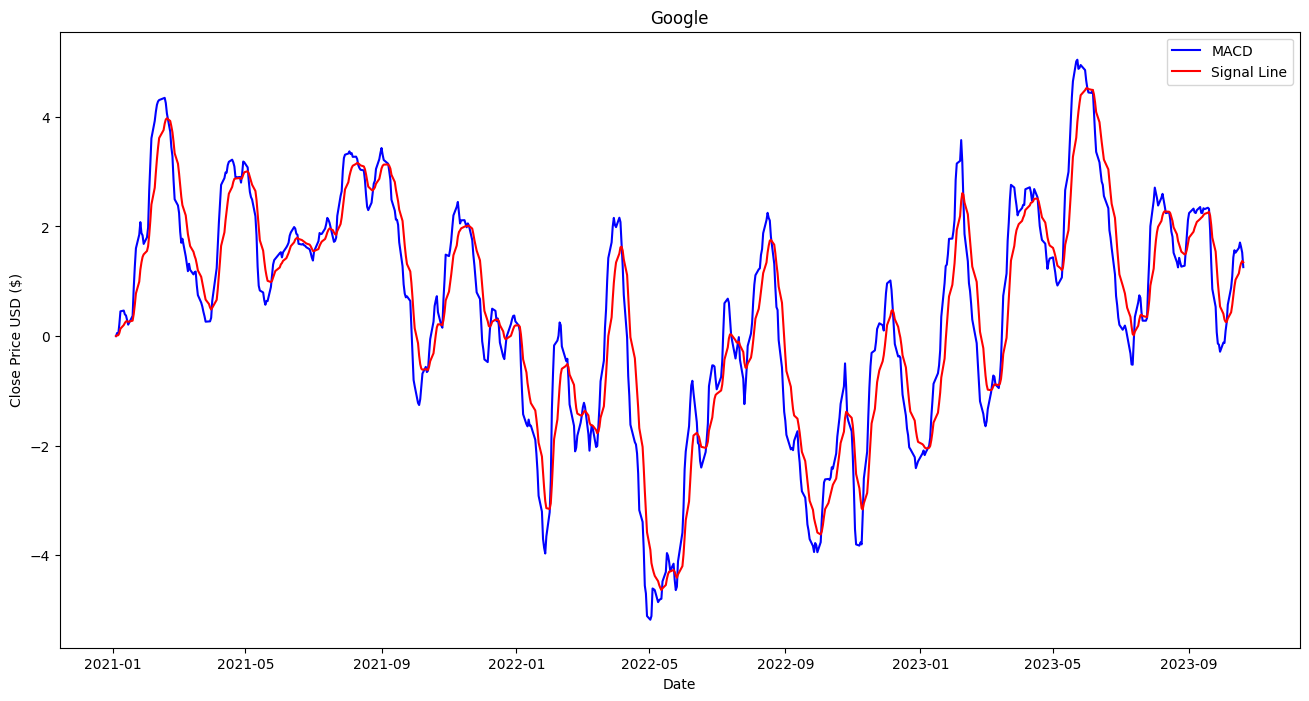

In [24]:
# MACD
# Moving Average Convergence Divergence
# 12 day EMA
ema_12 = df['close'].ewm(span=12, adjust=False).mean()
# 26 day EMA
ema_26 = df['close'].ewm(span=26, adjust=False).mean()
# MACD line
macd = ema_12 - ema_26
# signal line
signal = macd.ewm(span=9, adjust=False).mean()

plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
# plt.plot(df['close'], label='Close')
# plt.plot(macd, label='MACD')
plt.plot(macd, label='MACD', color='blue')
plt.plot(signal, label='Signal Line', color='red')

plt.legend()
plt.show()


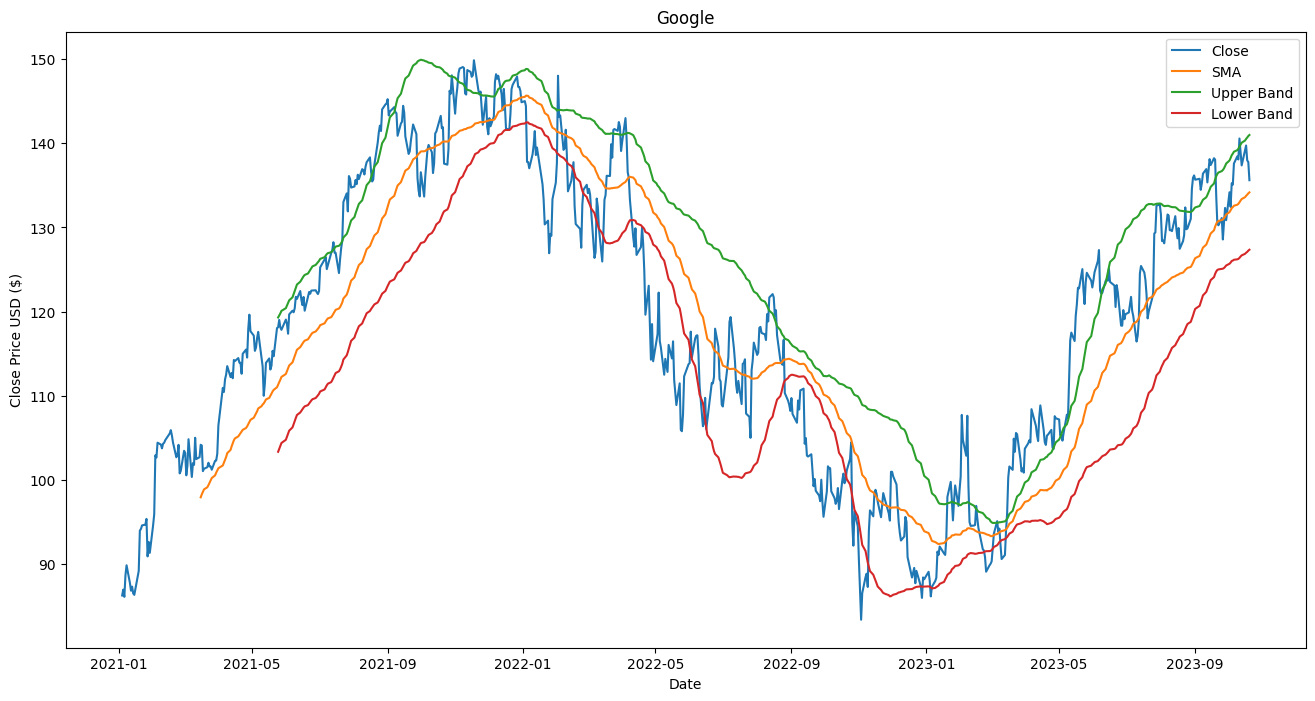

In [25]:
# Bollinger Bands
# 50 day SMA
sma = df['close'].rolling(window=50).mean()
# upper and lower bands
upper_band = sma + (2 * sma.rolling(window=50).std())
lower_band = sma - (2 * sma.rolling(window=50).std())

plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'], label='Close')
plt.plot(sma, label='SMA')
plt.plot(upper_band, label='Upper Band')
plt.plot(lower_band, label='Lower Band')
plt.legend()
plt.show()


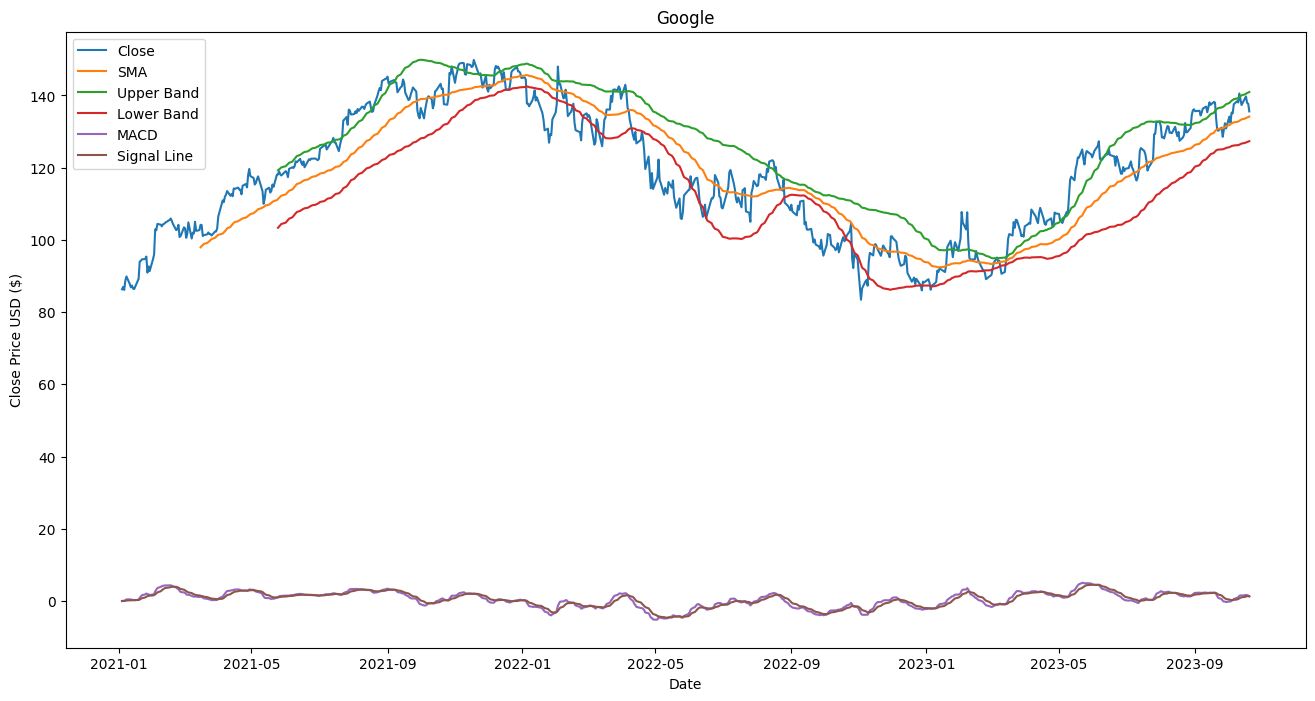

In [26]:
# visualizing all indicators together with close price
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'], label='Close')
plt.plot(sma, label='SMA')
plt.plot(upper_band, label='Upper Band')
plt.plot(lower_band, label='Lower Band')
plt.plot(macd, label='MACD')
plt.plot(signal, label='Signal Line')
plt.legend()
plt.show()





In [27]:
# creating new dataframe with indicators
new_df = pd.DataFrame()
new_df['close'] = df['close']
new_df['macd'] = macd
new_df['signal'] = signal
new_df['rsi'] = RSI
new_df.head()



,close,macd,signal,rsi
date,,,,
2021-01-04,86.3065,0.000000,0.000000,NaN
2021-01-05,87.0025,0.055521,0.011104,NaN
2021-01-06,86.1440,0.029904,0.014864,NaN
2021-01-07,88.7170,0.214746,0.054841,NaN
2021-01-08,89.8915,0.450811,0.134035,NaN


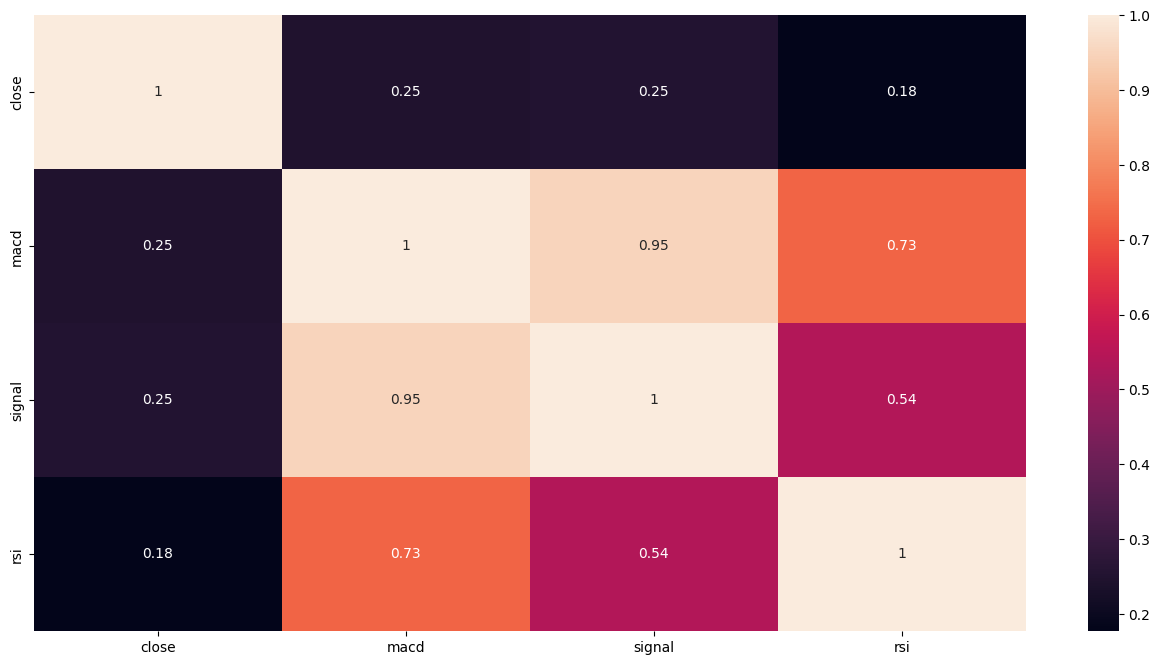

In [28]:
# correlation
# correlation matrix
corr = new_df.corr()
# heatmap
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True)
plt.show()


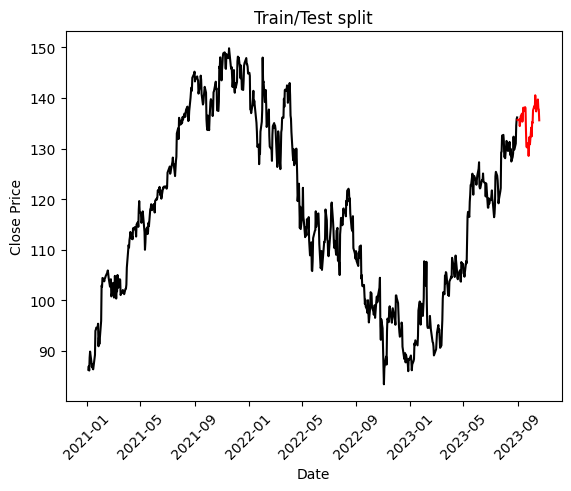

In [29]:
df = df[["close"]]

# TRAIN - TEST SPLIT
train = df[df.index < pd.to_datetime("2023-09-01", format="%Y-%m-%d")]
test = df[df.index >= pd.to_datetime("2023-09-01", format="%Y-%m-%d")]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split")
plt.show()

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [31]:
y = train['close']

In [32]:
# ARMA
ARMAmodel = SARIMAX(y, order=(1, 0, 1))

ARMAmodel = ARMAmodel.fit()

c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [33]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


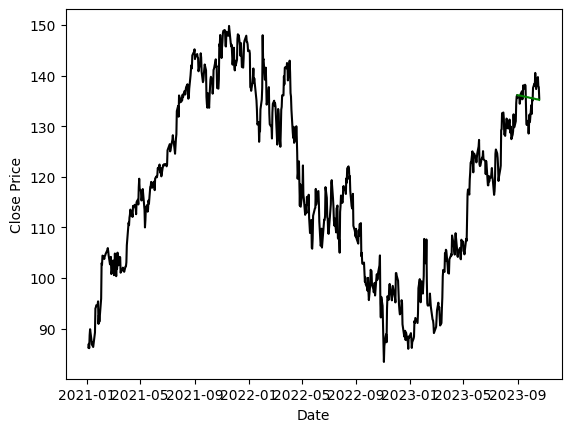

In [34]:
plt.plot(df, color = "black", label = 'Train')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Close Price')
plt.xlabel('Date')

plt.show()



ARIMA

In [35]:
from statsmodels.tsa.arima.model import ARIMA

c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is availab

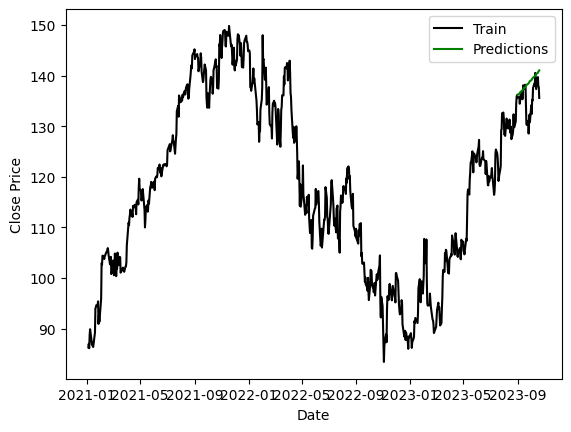

In [36]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(df, color = "black", label = 'Train')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()

c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA

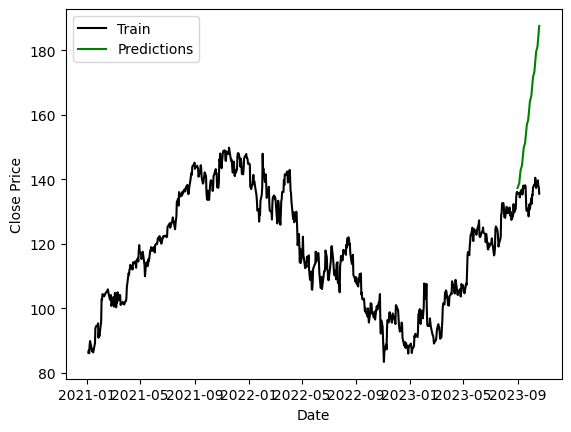

In [37]:
ARIMAmodel = ARIMA(y, order = (4, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(df, color = "black", label = 'Train')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()

In [38]:
from pmdarima import auto_arima

# Assuming y is your time series data
model = auto_arima(y, seasonal=True, stepwise=True, suppress_warnings=True)
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  670
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1508.890
Date:                Fri, 01 Dec 2023   AIC                           3019.780
Time:                        21:29:35   BIC                           3024.286
Sample:                             0   HQIC                          3021.525
                                - 670                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.3281      0.219     24.318      0.000       4.899       5.758
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                65.76
Prob(Q):                              0.74   Pr

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [40]:
adftest = adfuller(df['close'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -2.1465359629388003
P-Value: 0.519959287016446
Number of lags: 0
Number of observations: 704
Critical Values: {'1%': -3.9716872604618887, '5%': -3.4167447255369168, '10%': -3.1307307108522986}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


In [41]:
# Calculate first differences
df["close_diff"] = df['close'].diff()
df["close_diff"][0] = df["close_diff"].mean()
df.head()

C:\Users\jmmok\AppData\Local\Temp\ipykernel_21300\1963060357.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df["close_diff"][0] = df["close_diff"].mean()


,close,close_diff
date,,
2021-01-04,86.3065,0.070019
2021-01-05,87.0025,0.696000
2021-01-06,86.1440,-0.858500
2021-01-07,88.7170,2.573000
2021-01-08,89.8915,1.174500


In [42]:
adftest_diff = adfuller(df['close_diff'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest_diff[0])
print("P-Value:", adftest_diff[1])
print("Number of lags:", adftest_diff[2])
print("Number of observations:", adftest_diff[3])
print("Critical Values:", adftest_diff[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -26.88970842070983
P-Value: 0.0
Number of lags: 0
Number of observations: 704
Critical Values: {'1%': -3.9716872604618887, '5%': -3.4167447255369168, '10%': -3.1307307108522986}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


Uncomment the following cell if you want to grid search for the best ARIMA parameters

In [43]:
# param_grid = []
# for i in range(5):
#     for j in range(5):
#         for k in range(5):
#             param_grid.append((i, j, k))
# print(param_grid)

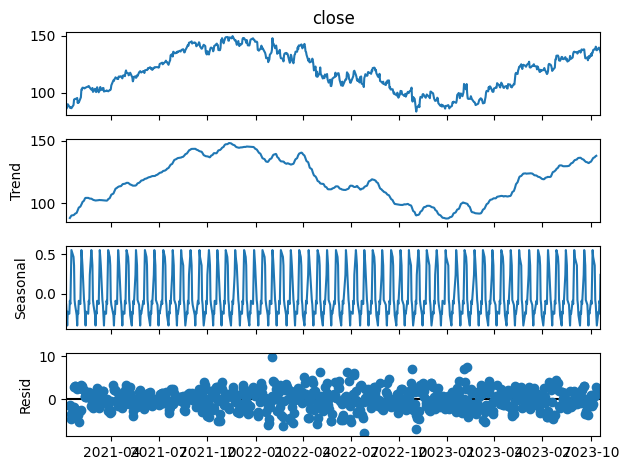

In [44]:
# Seasonality identification
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["close"], model='additive', period=12)
result.plot()
plt.show()


In [45]:
from joblib import *
from math import *
from sklearn.metrics import mean_squared_error

In [46]:
def arima_forecast(history, config):
 # define model
 print("History: ", history)
 model = SARIMAX(history, order=config)
 # fit model
 model_fit = model.fit(disp=False)
 # make one step forecast
 yhat = model_fit.predict(len(history), len(history))
 return yhat[0]

In [47]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
 return sqrt(mean_squared_error(actual, predicted))

In [48]:
def walk_forward_validation(train, test, cfg):
    predictions = list()
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = arima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error

In [49]:
def score_model(train, test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(train, test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(train, test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

In [50]:
# grid search configs
from threading import Thread


def grid_search(cfg_list, train, test, parallel=True):
	scores = []
	if parallel:
		threads = []
		for cfg in cfg_list:
			thread = Thread(target=lambda: scores.append(score_model(train, test, cfg, True)))
			thread.start()
			threads.append(thread)
		for thread in threads:
			thread.join()
	else:
		scores = [score_model(train, test, cfg, True) for cfg in cfg_list]
	scores = [r for r in scores if r[1] is not None]
	scores.sort(key=lambda tup: tup[1])
	return scores

In [51]:
def arima_configs():
    models = list()
    # define config lists
    p_params = [20, 40]
    # d_params = [0, 1, 2]
    d_params = [1]
    q_params = [30, 50]
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                cfg = (p,d,q)
                models.append(cfg)
    return models

In [52]:
cfg_list = arima_configs()


In [53]:
print(cfg_list)

[(20, 1, 30), (20, 1, 50), (40, 1, 30), (40, 1, 50)]


In [54]:
# grid search
scores = grid_search(cfg_list, train['close'], test['close'],parallel=True)
print('done')
print(scores)
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

In [55]:
# train with 1, 1, 2
# model = SARIMAX(train['close'], order=(30, 1, 40))
model = SARIMAX(train['close'], order=(40, 1, 50))
model_fit = model.fit()
print(model_fit.summary())


c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA p

c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  670
Model:             SARIMAX(40, 1, 50)   Log Likelihood               -1460.130
Date:                Fri, 01 Dec 2023   AIC                           3102.259
Time:                        21:31:04   BIC                           3512.286
Sample:                             0   HQIC                          3261.089
                                - 670                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0383      2.135     -0.018      0.986      -4.222       4.146
ar.L2         -0.0658      1.267     -0.052      0.959      -2.548       2.417
ar.L3         -0.1401      0.856     -0.164      0.8

In [56]:
# predict with test data
y_pred = model_fit.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)

y_pred_df["Predictions"] = model_fit.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [57]:
y_pred_df.head()

,lower close,upper close,Predictions
date,,,
2023-09-01,132.128406,140.434163,136.281284
2023-09-05,130.486866,142.134583,136.310725
2023-09-06,129.573578,143.630335,136.601956
2023-09-07,128.198170,144.024300,136.111235
2023-09-08,127.115073,144.552422,135.833748


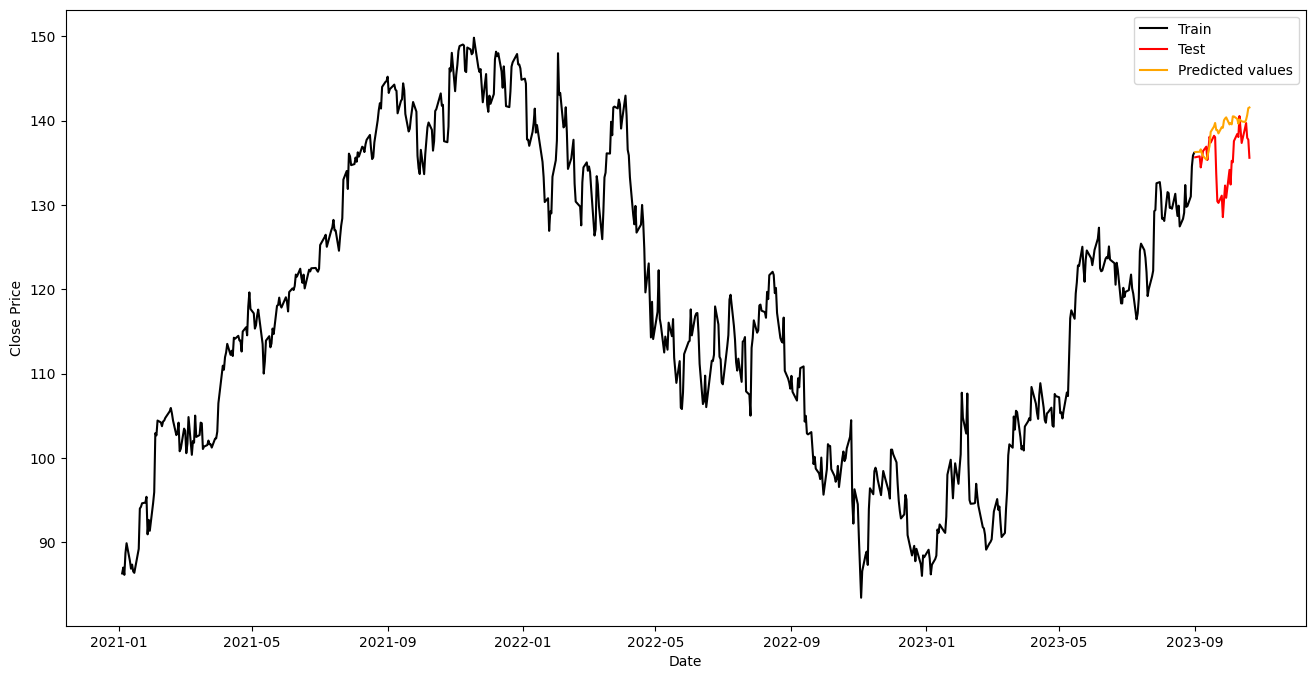

In [58]:
# plot train and predictions
# set size
plt.figure(figsize=(16,8))
plt.plot(train['close'], color = "black", label = 'Train')
plt.plot(test['close'], color = "red", label = 'Test')
# plt.plot(y_pred_out, color='green', label = 'Predictions')
# plt.plot(y_pred_df['lower close'], color = "blue", label = 'Lower predicted')
# plt.plot(y_pred_df['upper close'], color = "yellow", label = 'Upper predicted')
plt.plot(y_pred_df['Predictions'], color = "orange", label = 'Predicted values')
# fitted values
# plt.plot(model_fit.fittedvalues, color='blue', label = 'Fitted Values')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()


In [59]:
import pickle
# Save the model
model = None
with open('model.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

# save it also in backend/
with open('./backend/model.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

# Load the model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
    
# Make predictions from the loaded model
y_pred = model.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = model.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]




c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\jmmok\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [60]:
print(len(train.index))

670


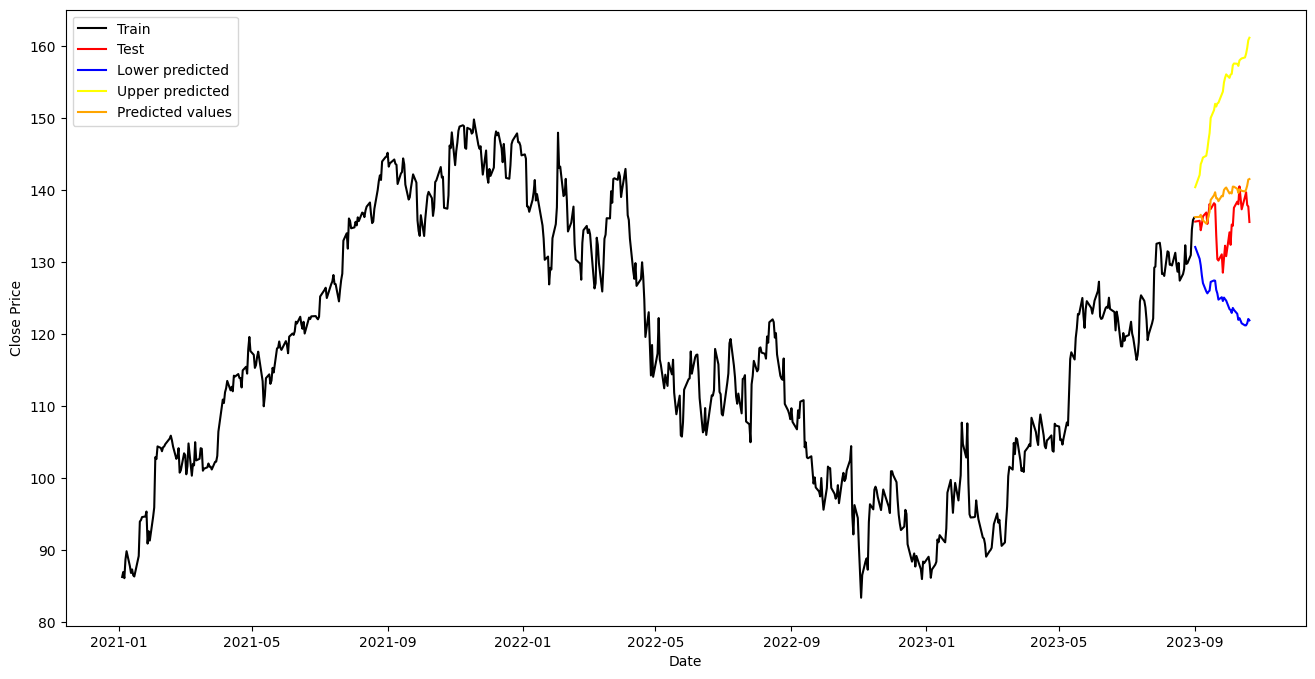

In [61]:
# plot train and predictions
# set size
plt.figure(figsize=(16,8))
plt.plot(train['close'], color = "black", label = 'Train')
plt.plot(test['close'], color = "red", label = 'Test')
# plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.plot(y_pred_df['lower close'], color = "blue", label = 'Lower predicted')
plt.plot(y_pred_df['upper close'], color = "yellow", label = 'Upper predicted')
plt.plot(y_pred_df['Predictions'], color = "orange", label = 'Predicted values')
# fitted values
# plt.plot(model_fit.fittedvalues, color='blue', label = 'Fitted Values')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()


In [62]:
import pickle
def getForecast(model ,date):
    import warnings
    warnings.filterwarnings('ignore')
    # Call the get_forecast() method with the desired date
    # calculate step using the date and the END_DATASET
    step = (pd.to_datetime(date) - pd.to_datetime(END_DATASET)).days
    print("step =", step)
    forecast = model.get_forecast(steps=step)

    # Access the forecasted values
    forecasted_values = forecast.predicted_mean
    # reset the indexes to start from 0
    
    forecasted_values = forecasted_values.reset_index(drop=True)
    
    # print(type(forecasted_values))
    # get the last value of the forecasted_values series
    i = forecasted_values[len(forecasted_values) - 1]
    # print("i =", i)
    # print(f"The forecasted value for {date} is {i}")
    
    # print("The forecasted value for {} is {}".format(date, forecasted_values[-1]))
    return forecasted_values



# test this function
forecastedValue = getForecast(model, '2023-11-01')
print(forecastedValue)

    

step = 12
0     136.281284
1     136.310725
2     136.601956
3     136.111235
4     135.833748
5     135.383507
6     135.696262
7     136.433854
8     137.015983
9     138.669630
10    139.309364
11    139.729995
Name: predicted_mean, dtype: float64


In [63]:
def getForecasts(model, date):
    import warnings
    warnings.filterwarnings('ignore')

    dateMinus20 = pd.to_datetime(date) - pd.DateOffset(days=20)
    datePlus5 = pd.to_datetime(date) + pd.DateOffset(days=5)
    
    step = (pd.to_datetime(datePlus5) - pd.to_datetime(END_DATASET)).days
    forecast = model.get_forecast(steps=step)

    # Access the forecasted values
    forecasted_values = forecast.predicted_mean
    # reset the indexes to start from 0
    
    forecasted_values = forecasted_values.reset_index(drop=True)
    
    # print(type(forecasted_values))
    # get the last value of the forecasted_values series
    i = forecasted_values[len(forecasted_values) - 1]
    # print("i =", i)
    # print(f"The forecasted value for {date} is {i}")
    
    # print("The forecasted value for {} is {}".format(date, forecasted_values[-1]))
    
    # set the index to dates from 2023-10-21 to datePlus5
    index = pd.date_range(pd.to_datetime('2023-10-21'), datePlus5)
    
    # create a new dataframe with the forecasted values and the index
    forecasted_values.index = index
    
    # now keep only the dates from dateMinus20 to datePlus5
    
    forecasted_values = forecasted_values[dateMinus20:datePlus5]
    
    print(type(forecasted_values))
    
    return forecasted_values

In [64]:
def displayForecast(model, date):
    # this function will display the forectasted values
    # the forecast starting 20 days before the date and ending 2 days after the date
    
    forecasts = getForecasts(model, date)
    
    # plot the forecasts
    plt.figure(figsize=(16,8))
    # plot forecasts
    # forecasts is a series
    plt.plot(forecasts, color='green', label='Forecast')
    plt.ylabel('Close Price')
    plt.xlabel('Date')
    plt.legend()
    plt.show()
    
    

<class 'pandas.core.series.Series'>


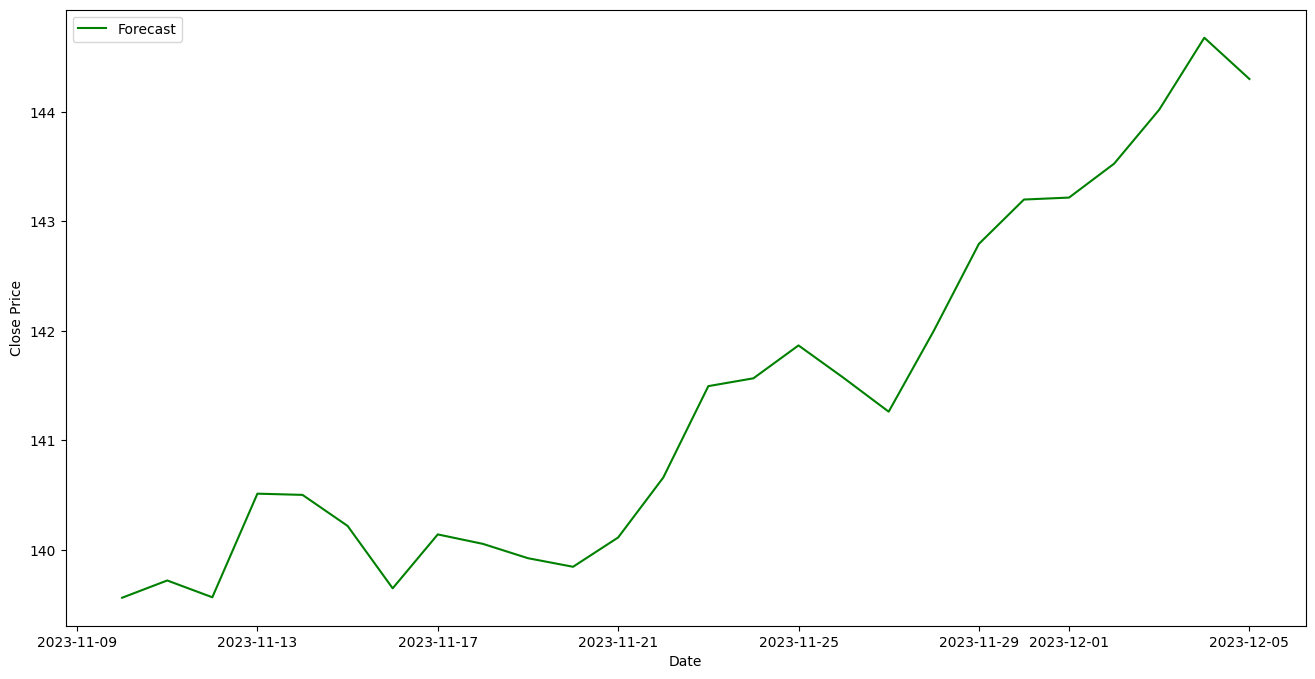

In [65]:
displayForecast(model, '2023-11-30')


In [66]:
# get from 2023-11-1 to 2023-11-30
# 30 days

# predict using loaded model
y_pred = model.get_forecast(steps=30)
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = model.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])


In [67]:
y_pred_df.head()

,lower close,upper close,Predictions
670,132.128406,140.434163,136.281284
671,130.486866,142.134583,136.310725
672,129.573578,143.630335,136.601956
673,128.198170,144.024300,136.111235
674,127.115073,144.552422,135.833748


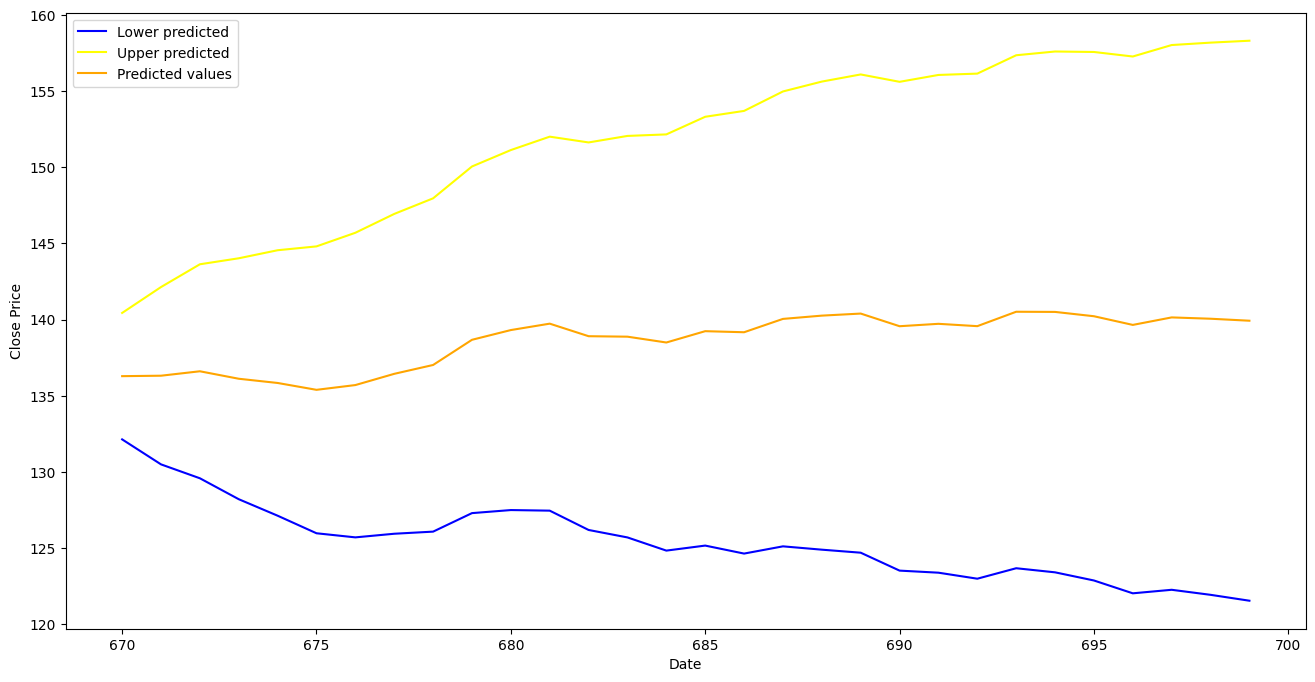

In [68]:

# plot predictions
plt.figure(figsize=(16,8))
plt.plot(y_pred_df['lower close'], color = "blue", label = 'Lower predicted')
plt.plot(y_pred_df['upper close'], color = "yellow", label = 'Upper predicted')
plt.plot(y_pred_df['Predictions'], color = "orange", label = 'Predicted values')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()

Thank you for going through this notebook. We hope you enjoyed.